In [2]:
import pandas as pd
import numpy as np

In [3]:
part_d_df = pd.read_csv('data/part_d_2013.csv', low_memory=False)
exclusion_df = pd.read_csv('data/exclusion_list_2014.csv', low_memory=False)
print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (23645873, 21)


In [3]:
part_d_df.head(2)

npi nppes_provider_last_org_name nppes_provider_first_name  \
0  1003049925                         BEST                      DAWN   
1  1003049925                         BEST                      DAWN   

  nppes_provider_city nppes_provider_state specialty_description  \
0        GLENNS FERRY                   ID    Nurse Practitioner   
1        GLENNS FERRY                   ID    Nurse Practitioner   

  description_flag   drug_name            generic_name  bene_count  ...  \
0                S      NEXIUM  ESOMEPRAZOLE MAGNESIUM         NaN  ...   
1                S  OMEPRAZOLE              OMEPRAZOLE        18.0  ...   

   total_30_day_fill_count  total_day_supply  total_drug_cost  \
0                     24.0               720          5353.41   
1                    108.0              3240          1493.91   

   bene_count_ge65  bene_count_ge65_suppress_flag total_claim_count_ge65  \
0              NaN                              *                    NaN   
1              NaN                              #                   56.0   

   ge65_suppress_flag total_30_day_fill_count_ge65  total_day_supply_ge65  \
0                   *                          NaN                    NaN   
1                 NaN                         70.0                 2100.0   

   total_drug_cost_ge65  
0                   NaN  
1                956.83  

[2 rows x 21 columns]

In [4]:
exclusion_df.head(2)
len(exclusion_df)

566

In [4]:
# reorganize data columns
part_d_df = part_d_df[['npi', 'nppes_provider_city','nppes_provider_state', 'specialty_description', 'description_flag',\
                        'drug_name', 'generic_name', 'bene_count', 'total_claim_count','total_day_supply', \
                        'total_drug_cost', 'bene_count_ge65', 'total_claim_count_ge65', 'total_day_supply_ge65',\
                        'total_drug_cost_ge65']]

# assigning exclusion (False = 0, True = 1)
exclusion_npi = exclusion_df['NPI'].values.tolist()

part_d_df['is_excluded'] = 0
part_d_df.loc[part_d_df['npi'].isin(exclusion_npi), 'is_excluded'] = 1

# get US data to analyze
states = ['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', \
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', \
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', \
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', \
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',' WY']

part_d_df = part_d_df[part_d_df['nppes_provider_state'].isin(states)]

print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (23233763, 16)


In [6]:
len(exclusion_df['NPI'].unique())

565

In [7]:
len(exclusion_df['SPECIALTY'].unique())

56

In [8]:
len(part_d_df.loc[part_d_df['npi'].isin(exclusion_npi)])

5748

In [9]:
part_d_df.loc[part_d_df['is_excluded']==1].head(2)

npi nppes_provider_city nppes_provider_state  \
24496  1003801044              KENNER                   LA   
24497  1003801044              KENNER                   LA   

      specialty_description description_flag          drug_name  \
24496     Internal Medicine                S  CIPROFLOXACIN HCL   
24497     Internal Medicine                S  DILTIAZEM 24HR CD   

            generic_name  bene_count  total_claim_count  total_day_supply  \
24496  CIPROFLOXACIN HCL         NaN                 11               104   
24497      DILTIAZEM HCL         NaN                 25               990   

       total_drug_cost  bene_count_ge65  total_claim_count_ge65  \
24496            71.18              NaN                     NaN   
24497           840.47              NaN                    25.0   

       total_day_supply_ge65  total_drug_cost_ge65  is_excluded  
24496                    NaN                   NaN            1  
24497                  990.0                840.47            1

In [10]:
# Top 20 states which has the most prescribers
part_d_df_state_count = part_d_df.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_state_count

npi  nppes_provider_city  specialty_description  \
nppes_provider_state                                                        
CA                    2282144              2282144                2282144   
NY                    1626307              1626307                1626307   
FL                    1570903              1570903                1570903   
TX                    1436509              1436509                1436509   
PA                    1214631              1214631                1214631   
OH                     990148               990148                 990148   
NC                     866187               866187                 866187   
IL                     831102               831102                 831102   
MI                     804781               804781                 804781   
NJ                     648095               648095                 648095   
GA                     648055               648055                 648055   
TN                     626872               626872                 626872   
MO                     541302               541302                 541302   
MA                     538990               538990                 538990   
IN                     529990               529990                 529990   
VA                     519437               519437                 519437   
WI                     458386               458386                 458386   
WA                     452618               452618                 452618   
KY                     442688               442688                 442688   
AL                     419824               419824                 419824   

                      description_flag  drug_name  generic_name  bene_count  \
nppes_provider_state                                                          
CA                             2282144    2282144       2282144      865190   
NY                             1626307    1626307       1626307      571115   
FL                             1570903    1570903       1570903      663148   
TX                             1436509    1436509       1436509      568033   
PA                             1214631    1214631       1214631      417863   
OH                              990148     990148        990148      377699   
NC                              866187     866187        866187      317780   
IL                              831102     831102        831102      276049   
MI                              804781     804781        804781      317050   
NJ                              648095     648095        648095      230367   
GA                              648055     648055        648055      256027   
TN                              626872     626872        626872      248772   
MO                              541302     541302        541302      193076   
MA                              538990     538990        538990      168380   
IN                              529990     529990        529990      197313   
VA                              519437     519437        519437      182415   
WI                              458386     458386        458386      144520   
WA                              452618     452618        452618      142459   
KY                              442688     442688        442688      172318   
AL                              419824     419824        419824      175269   

                      total_claim_count  total_day_supply  total_drug_cost  \
nppes_provider_state                                                         
CA                              2282144           2282144          2282144   
NY                              1626307           1626307          1626307   
FL                              1570903           1570903          1570903   
TX                              1436509           1436509          1436509   
PA                              1214631           1214631          1214631   
OH                               990148       

In [11]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

npi  nppes_provider_city  nppes_provider_state  \
is_excluded                                                        
0            23228015             23228012              23228015   
1                5748                 5748                  5748   

             specialty_description  description_flag  drug_name  generic_name  \
is_excluded                                                                     
0                         23228015          23228015   23228015      23228015   
1                             5748              5748       5748          5748   

             bene_count  total_claim_count  total_day_supply  total_drug_cost  \
is_excluded                                                                     
0               8467676           23228015          23228015         23228015   
1                  1893               5748              5748             5748   

             bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
is_excluded                                                                   
0                    3144022                13618857               13618857   
1                        854                    3280                   3280   

             total_drug_cost_ge65  
is_excluded                        
0                        13618857  
1                            3280

In [12]:
# export exclusion providers data to do statistics analysis, run once when needed by uncommenting two lines below
part_d_df_exclusion = part_d_df[part_d_df['is_excluded'] == 1]
#part_d_df_exclusion.to_csv('exclusion2017.csv')

In [13]:
len(part_d_df_exclusion['npi'].unique())

149

In [14]:
part_d_df_exclusion[['npi']].to_csv('2013_part_d_e_npi.csv')

In [14]:
len(part_d_df_exclusion['drug_name'].unique())

637

In [15]:
len(part_d_df_exclusion['specialty_description'].unique())

29

In [16]:
part_d_df_exclusion['specialty_description'].unique()

array(['Internal Medicine', 'Family Practice', 'General Surgery',
       'Psychiatry & Neurology', 'Allergy/Immunology', 'Specialist',
       'Psychiatry', 'Cardiology', 'Ophthalmology', 'Anesthesiology',
       'Emergency Medicine', 'Gastroenterology',
       'Oral Surgery (dentists only)', 'Dentist', 'Podiatry', 'CRNA',
       'Physician Assistant', 'Family Medicine', 'General Practice',
       'Pulmonary Disease', 'Geriatric Medicine', 'Obstetrics/Gynecology',
       'Nurse Practitioner', 'Pediatric Medicine', 'Orthopedic Surgery',
       'Physical Medicine and Rehabilitation', 'Urology', 'Neurosurgery',
       'Dermatology'], dtype=object)

In [17]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_exclusion_npi_count = part_d_df_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_exclusion_npi_count.reset_index(level=["npi"], inplace=True)
part_d_df_exclusion_npi_count

npi  nppes_provider_city  nppes_provider_state  \
0  1841303310                  294                   294   
1  1902829112                  289                   289   
2  1942202841                  240                   240   
3  1114972262                  213                   213   
4  1851338248                  189                   189   
5  1902845480                  174                   174   
6  1700981917                  146                   146   
7  1265469472                  145                   145   
8  1205813441                  144                   144   
9  1760558548                  132                   132   

   specialty_description  description_flag  drug_name  generic_name  \
0                    294               294        294           294   
1                    289               289        289           289   
2                    240               240        240           240   
3                    213               213        213           213   
4                    189               189        189           189   
5                    174               174        174           174   
6                    146               146        146           146   
7                    145               145        145           145   
8                    144               144        144           144   
9                    132               132        132           132   

   bene_count  total_claim_count  total_day_supply  total_drug_cost  \
0         136                294               294              294   
1         123                289               289              289   
2         103                240               240              240   
3          94                213               213              213   
4          61                189               189              189   
5          91                174               174              174   
6          60                146               146              146   
7          41                145               145              145   
8          52                144               144              144   
9          30                132               132              132   

   bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
0               55                     193                    193   
1               39                     215                    215   
2               25                     158                    158   
3               37                     118                    118   
4               11                     121                    121   
5               33                     105                    105   
6               17                      93                     93   
7                3                      91                     91   
8               24                      86                     86   
9               13                      94                     94   

   total_drug_cost_ge65  is_excluded  
0                   193          294  
1                   215          289  
2                   158          240  
3                   118          213  
4                   121          189  
5                   105          174  
6                    93          146  
7                    91          145  
8                    86          144  
9                    94          132

In [18]:
# Top 20 states which has the most excluded prescribers
part_d_df_exclusion_state_count = part_d_df_exclusion.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_state_count.reset_index(level=["nppes_provider_state"], inplace=True)
part_d_df_exclusion_state_count

nppes_provider_state  npi  nppes_provider_city  specialty_description  \
0                    CA  957                  957                    957   
1                    NJ  756                  756                    756   
2                    TN  567                  567                    567   
3                    PA  544                  544                    544   
4                    MO  439                  439                    439   
5                    MI  381                  381                    381   
6                    NY  344                  344                    344   
7                    TX  300                  300                    300   
8                    IL  242                  242                    242   
9                    VA  214                  214                    214   
10                   AL  176                  176                    176   
11                   OH  159                  159                    159   
12                   WV  148                  148                    148   
13                   MD  106                  106                    106   
14                   MA   77                   77                     77   
15                   WI   71                   71                     71   
16                   WA   65                   65                     65   
17                   FL   52                   52                     52   
18                   GA   44                   44                     44   
19                   LA   39                   39                     39   

    description_flag  drug_name  generic_name  bene_count  total_claim_count  \
0                957        957           957         269                957   
1                756        756           756         251                756   
2                567        567           567         181                567   
3                544        544           544         209                544   
4                439        439           439         167                439   
5                381        381           381         123                381   
6                344        344           344         122                344   
7                300        300           300          72                300   
8                242        242           242          81                242   
9                214        214           214          69                214   
10               176        176           176          91                176   
11               159        159           159          59                159   
12               148        148           148          41                148   
13               106        106           106          31                106   
14                77         77            77          42                 77   
15                71         71            71          26                 71   
16                65         65            65          21                 65   
17                52         52            52          16                 52   
18                44         44            44           3                 44   
19                39         39            39           8                 39   

    total_day_supply  total_drug_cost  bene_count_ge65  \
0                957              957              114   
1                756              756               55   
2                567              567              103   
3                544              544               73   
4                439              439               61   
5                381              381               93   
6                344              344               71   
7                300              300               35   
8                242              242               27   
9                214              214               55   
10               176              176               33   
11               159         

In [19]:
# Top 20 specialties which has the most excluded prescribers
part_d_df_exclusion_specialty_count = part_d_df_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_exclusion_specialty_count

specialty_description   npi  nppes_provider_city  nppes_provider_state  \
0        Internal Medicine  2378                 2378                  2378   
1          Family Practice  1414                 1414                  1414   
2               Psychiatry   379                  379                   379   
3       Emergency Medicine   302                  302                   302   
4               Cardiology   222                  222                   222   
5      Physician Assistant   186                  186                   186   
6       Geriatric Medicine   167                  167                   167   
7         General Practice   158                  158                   158   
8          General Surgery   128                  128                   128   
9           Anesthesiology    81                   81                    81   
10      Nurse Practitioner    58                   58                    58   
11              Specialist    55                   55                    55   
12        Gastroenterology    47                   47                    47   
13                Podiatry    28                   28                    28   
14           Ophthalmology    24                   24                    24   
15                 Dentist    22                   22                    22   
16      Allergy/Immunology    21                   21                    21   
17      Orthopedic Surgery    16                   16                    16   
18   Obstetrics/Gynecology    14                   14                    14   
19  Psychiatry & Neurology    11                   11                    11   

    description_flag  drug_name  generic_name  bene_count  total_claim_count  \
0               2378       2378          2378         801               2378   
1               1414       1414          1414         367               1414   
2                379        379           379         172                379   
3                302        302           302         139                302   
4                222        222           222          66                222   
5                186        186           186          68                186   
6                167        167           167          39                167   
7                158        158           158          50                158   
8                128        128           128          25                128   
9                 81         81            81          42                 81   
10                58         58            58          25                 58   
11                55         55            55          17                 55   
12                47         47            47          13                 47   
13                28         28            28          12                 28   
14                24         24            24          10                 24   
15                22         22            22          17                 22   
16                21         21            21          13                 21   
17                16         16            16           7                 16   
18                14         14            14           1                 14   
19                11         11            11           0                 11   

    total_day_supply  total_drug_cost  bene_count_ge65  \
0               2378             2378              305   
1               1414             1414              176   
2                379              379              115   
3                302              302               59   
4                222              222                7   
5                186              186               27   
6                167              167               23   
7                158              158               32   
8                128              128               24   
9                 81               81               31   
10                58      

After full US dataset analysis, will use NJ data to do detailed analysis

In [19]:
part_d_df_small=part_d_df[part_d_df['nppes_provider_state']=='NJ']

In [20]:
len(part_d_df_small)

648095

In [21]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df_small.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

npi  nppes_provider_city  nppes_provider_state  \
is_excluded                                                      
0            647339               647339                647339   
1               756                  756                   756   

             specialty_description  description_flag  drug_name  generic_name  \
is_excluded                                                                     
0                           647339            647339     647339        647339   
1                              756               756        756           756   

             bene_count  total_claim_count  total_day_supply  total_drug_cost  \
is_excluded                                                                     
0                230116             647339            647339           647339   
1                   251                756               756              756   

             bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
is_excluded                                                                   
0                      90316                  393402                 393402   
1                         55                     428                    428   

             total_drug_cost_ge65  
is_excluded                        
0                          393402  
1                             428

In [22]:
# Top specialties which has the most excluded prescribers in small dataset
part_d_df_small_exclusion = part_d_df_small[part_d_df_small['is_excluded'] == 1]
part_d_df_small_exclusion_specialty_count = part_d_df_small_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_small_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_small_exclusion_specialty_count

specialty_description  npi  nppes_provider_city  nppes_provider_state  \
0     Internal Medicine  449                  449                   449   
1    Geriatric Medicine   94                   94                    94   
2            Cardiology   63                   63                    63   
3    Nurse Practitioner   50                   50                    50   
4      Gastroenterology   47                   47                    47   
5       Family Practice   29                   29                    29   
6            Specialist   24                   24                    24   

   description_flag  drug_name  generic_name  bene_count  total_claim_count  \
0               449        449           449         152                449   
1                94         94            94          27                 94   
2                63         63            63          22                 63   
3                50         50            50          20                 50   
4                47         47            47          13                 47   
5                29         29            29           7                 29   
6                24         24            24          10                 24   

   total_day_supply  total_drug_cost  bene_count_ge65  total_claim_count_ge65  \
0               449              449               35                     276   
1                94               94                2                      40   
2                63               63                3                      38   
3                50               50                0                      18   
4                47               47                6                      35   
5                29               29                0                       9   
6                24               24                9                      12   

   total_day_supply_ge65  total_drug_cost_ge65  is_excluded  
0                    276                   276          449  
1                     40                    40           94  
2                     38                    38           63  
3                     18                    18           50  
4                     35                    35           47  
5                      9                     9           29  
6                     12                    12           24

In [23]:
# add a new field called drug_count to the dataframe
part_d_df_small["drug_count"] = 1

# use the groupby() and agg() methods to create a new dataframe. use numpy sum method to populate values
prescriber_specialty_df = part_d_df_small.groupby(["npi","specialty_description"]).agg({"total_claim_count": np.sum,  "drug_count": np.sum})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
prescriber_specialty_df.head()

total_claim_count  drug_count
npi        specialty_description                               
1003002072 Urology                              237          10
1003002858 Nurse Practitioner                  1793          48
1003012410 Family Practice                      216          14
1003019910 Dentist                              229           4
1003020975 Internal Medicine                   1205          43

In [25]:
# to merge the tables we need to flatten the indices.
prescriber_specialty_df.reset_index(level=["npi","specialty_description"], inplace=True)

In [26]:
prescriber_specialty_df.head()

npi specialty_description  total_claim_count  drug_count
0  1003002072               Urology                237          10
1  1003002858    Nurse Practitioner               1793          48
2  1003012410       Family Practice                216          14
3  1003019910               Dentist                229           4
4  1003020975     Internal Medicine               1205          43

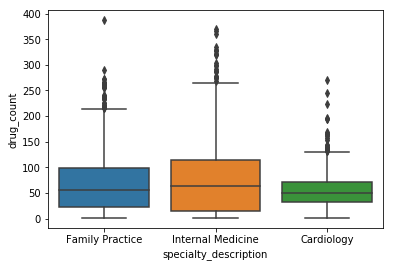

In [27]:
# show that different medical specialties prescribe different numbers of drugs
import seaborn as sb
%matplotlib inline

sb.boxplot(x="specialty_description", y="drug_count", 
           data=prescriber_specialty_df
           [
           (prescriber_specialty_df["specialty_description"] == "Internal Medicine") |
           (prescriber_specialty_df["specialty_description"] == "Family Practice") |
           (prescriber_specialty_df["specialty_description"] == "Cardiology")
           ]
          )

In [28]:
# User pandas crosstab function to create a dataframe where each row is a prescriber identified by their NPI, 
# the columns are the drug generic names, the values are the sum of total_claim_count
npi_generic_cross_df = pd.crosstab(part_d_df_small["npi"], part_d_df_small["generic_name"], values=part_d_df_small["total_claim_count"], 
                                  aggfunc=np.sum)

In [29]:
# To replace the NaN (not a number) from the cells with zero the fillna() method is used.
npi_generic_cross_df = npi_generic_cross_df.fillna(0)

In [30]:
npi_generic_cross_df.head()

generic_name  0.9 % SODIUM CHLORIDE  AA 4.25%/CALCIUM/LYTES/DEX 10%  \
npi                                                                   
1003002072                      0.0                             0.0   
1003002858                      0.0                             0.0   
1003012410                      0.0                             0.0   
1003019910                      0.0                             0.0   
1003020975                      0.0                             0.0   

generic_name  ABACAVIR SULFATE  ABACAVIR SULFATE/LAMIVUDINE  \
npi                                                           
1003002072                 0.0                          0.0   
1003002858                 0.0                          0.0   
1003012410                 0.0                          0.0   
1003019910                 0.0                          0.0   
1003020975                 0.0                          0.0   

generic_name  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  ABATACEPT/MALTOSE  \
npi                                                                          
1003002072                               0.0        0.0                0.0   
1003002858                               0.0        0.0                0.0   
1003012410                               0.0        0.0                0.0   
1003019910                               0.0        0.0                0.0   
1003020975                               0.0        0.0                0.0   

generic_name  ABIRATERONE ACETATE  ACAMPROSATE CALCIUM  ACARBOSE  ...  \
npi                                                               ...   
1003002072                    0.0                  0.0       0.0  ...   
1003002858                    0.0                  0.0       0.0  ...   
1003012410                    0.0                  0.0       0.0  ...   
1003019910                    0.0                  0.0       0.0  ...   
1003020975                    0.0                  0.0       0.0  ...   

generic_name  ZALEPLON  ZIDOVUDINE  ZILEUTON  ZINC ACETATE  ZIPRASIDONE HCL  \
npi                                                                           
1003002072         0.0         0.0       0.0           0.0              0.0   
1003002858         0.0         0.0       0.0           0.0              0.0   
1003012410         0.0         0.0       0.0           0.0              0.0   
1003019910         0.0         0.0       0.0           0.0              0.0   
1003020975         0.0         0.0       0.0           0.0              0.0   

generic_name  ZOLEDRONIC ACID  ZOLMITRIPTAN  ZOLPIDEM TARTRATE  ZONISAMIDE  \
npi                                                                          
1003002072                0.0           0.0                0.0         0.0   
1003002858                0.0           0.0               17.0         0.0   
1003012410                0.0           0.0                0.0         0.0   
1003019910                0.0           0.0                0.0         0.0   
1003020975                0.0           0.0                0.0         0.0   

generic_name  ZOSTER VACCINE LIVE/PF  
npi                                   
1003002072                       0.0  
1003002858                       0.0  
1003012410                       0.0  
1003019910                       0.0  
1003020975                       0.0  

[5 rows x 1169 columns]

In [31]:
# use npi to merge two tables prescriber_specialty_df and npi_generic_cross_df
prescriber_specialty_generic_df = pd.merge(prescriber_specialty_df, npi_generic_cross_df.reset_index(level=["npi"]), on="npi")

In [32]:
prescriber_specialty_generic_df.head()

npi specialty_description  total_claim_count  drug_count  \
0  1003002072               Urology                237          10   
1  1003002858    Nurse Practitioner               1793          48   
2  1003012410       Family Practice                216          14   
3  1003019910               Dentist                229           4   
4  1003020975     Internal Medicine               1205          43   

   0.9 % SODIUM CHLORIDE  AA 4.25%/CALCIUM/LYTES/DEX 10%  ABACAVIR SULFATE  \
0                    0.0                             0.0               0.0   
1                    0.0                             0.0               0.0   
2                    0.0                             0.0               0.0   
3                    0.0                             0.0               0.0   
4                    0.0                             0.0               0.0   

   ABACAVIR SULFATE/LAMIVUDINE  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  \
0                          0.0                             0.0        0.0   
1                          0.0                             0.0        0.0   
2                          0.0                             0.0        0.0   
3                          0.0                             0.0        0.0   
4                          0.0                             0.0        0.0   

   ...  ZALEPLON  ZIDOVUDINE  ZILEUTON  ZINC ACETATE  ZIPRASIDONE HCL  \
0  ...       0.0         0.0       0.0           0.0              0.0   
1  ...       0.0         0.0       0.0           0.0              0.0   
2  ...       0.0         0.0       0.0           0.0              0.0   
3  ...       0.0         0.0       0.0           0.0              0.0   
4  ...       0.0         0.0       0.0           0.0              0.0   

   ZOLEDRONIC ACID  ZOLMITRIPTAN  ZOLPIDEM TARTRATE  ZONISAMIDE  \
0              0.0           0.0                0.0         0.0   
1              0.0           0.0               17.0         0.0   
2              0.0           0.0                0.0         0.0   
3              0.0           0.0                0.0         0.0   
4              0.0           0.0                0.0         0.0   

   ZOSTER VACCINE LIVE/PF  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 1173 columns]

In [33]:
prescriber_specialty_generic_df = prescriber_specialty_generic_df.sort_values(by=["specialty_description", "npi"])

In [34]:
prescriber_specialty_generic_df.head()

npi specialty_description  total_claim_count  drug_count  \
2016  1083895114    Addiction Medicine               3088          40   
128   1003878943    Allergy/Immunology                112           7   
386   1013919141    Allergy/Immunology                323           9   
409   1013941012    Allergy/Immunology                391           9   
682   1033116801    Allergy/Immunology                196           9   

      0.9 % SODIUM CHLORIDE  AA 4.25%/CALCIUM/LYTES/DEX 10%  ABACAVIR SULFATE  \
2016                    0.0                             0.0               0.0   
128                     0.0                             0.0               0.0   
386                     0.0                             0.0               0.0   
409                     0.0                             0.0               0.0   
682                     0.0                             0.0               0.0   

      ABACAVIR SULFATE/LAMIVUDINE  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  \
2016                          0.0                             0.0        0.0   
128                           0.0                             0.0        0.0   
386                           0.0                             0.0        0.0   
409                           0.0                             0.0        0.0   
682                           0.0                             0.0        0.0   

      ...  ZALEPLON  ZIDOVUDINE  ZILEUTON  ZINC ACETATE  ZIPRASIDONE HCL  \
2016  ...       0.0         0.0       0.0           0.0             44.0   
128   ...       0.0         0.0       0.0           0.0              0.0   
386   ...       0.0         0.0       0.0           0.0              0.0   
409   ...       0.0         0.0       0.0           0.0              0.0   
682   ...       0.0         0.0       0.0           0.0              0.0   

      ZOLEDRONIC ACID  ZOLMITRIPTAN  ZOLPIDEM TARTRATE  ZONISAMIDE  \
2016              0.0           0.0              177.0         0.0   
128               0.0           0.0                0.0         0.0   
386               0.0           0.0                0.0         0.0   
409               0.0           0.0                0.0         0.0   
682               0.0           0.0                0.0         0.0   

      ZOSTER VACCINE LIVE/PF  
2016                     0.0  
128                      0.0  
386                      0.0  
409                      0.0  
682                      0.0  

[5 rows x 1173 columns]

In [35]:
# Since the data has been resorted by specialty_desc and npi, index needs to be updated to reflect new order of data
prescriber_specialty_generic_df=prescriber_specialty_generic_df.reset_index(drop=True)
prescriber_specialty_generic_df.head()

npi specialty_description  total_claim_count  drug_count  \
0  1083895114    Addiction Medicine               3088          40   
1  1003878943    Allergy/Immunology                112           7   
2  1013919141    Allergy/Immunology                323           9   
3  1013941012    Allergy/Immunology                391           9   
4  1033116801    Allergy/Immunology                196           9   

   0.9 % SODIUM CHLORIDE  AA 4.25%/CALCIUM/LYTES/DEX 10%  ABACAVIR SULFATE  \
0                    0.0                             0.0               0.0   
1                    0.0                             0.0               0.0   
2                    0.0                             0.0               0.0   
3                    0.0                             0.0               0.0   
4                    0.0                             0.0               0.0   

   ABACAVIR SULFATE/LAMIVUDINE  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  \
0                          0.0                             0.0        0.0   
1                          0.0                             0.0        0.0   
2                          0.0                             0.0        0.0   
3                          0.0                             0.0        0.0   
4                          0.0                             0.0        0.0   

   ...  ZALEPLON  ZIDOVUDINE  ZILEUTON  ZINC ACETATE  ZIPRASIDONE HCL  \
0  ...       0.0         0.0       0.0           0.0             44.0   
1  ...       0.0         0.0       0.0           0.0              0.0   
2  ...       0.0         0.0       0.0           0.0              0.0   
3  ...       0.0         0.0       0.0           0.0              0.0   
4  ...       0.0         0.0       0.0           0.0              0.0   

   ZOLEDRONIC ACID  ZOLMITRIPTAN  ZOLPIDEM TARTRATE  ZONISAMIDE  \
0              0.0           0.0              177.0         0.0   
1              0.0           0.0                0.0         0.0   
2              0.0           0.0                0.0         0.0   
3              0.0           0.0                0.0         0.0   
4              0.0           0.0                0.0         0.0   

   ZOSTER VACCINE LIVE/PF  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 1173 columns]

In [36]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_small_exclusion_npi_count = part_d_df_small_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_small_exclusion_npi_count

nppes_provider_city  nppes_provider_state  specialty_description  \
npi                                                                            
1942202841                  240                   240                    240   
1215045869                  124                   124                    124   
1417959503                   94                    94                     94   
1053393405                   63                    63                     63   
1285702829                   58                    58                     58   
1699840264                   50                    50                     50   
1114072444                   47                    47                     47   
1093805012                   29                    29                     29   
1831276880                   25                    25                     25   
1043311145                   24                    24                     24   

            description_flag  drug_name  generic_name  bene_count  \
npi                                                                 
1942202841               240        240           240         103   
1215045869               124        124           124          41   
1417959503                94         94            94          27   
1053393405                63         63            63          22   
1285702829                58         58            58           8   
1699840264                50         50            50          20   
1114072444                47         47            47          13   
1093805012                29         29            29           7   
1831276880                25         25            25           0   
1043311145                24         24            24          10   

            total_claim_count  total_day_supply  total_drug_cost  \
npi                                                                
1942202841                240               240              240   
1215045869                124               124              124   
1417959503                 94                94               94   
1053393405                 63                63               63   
1285702829                 58                58               58   
1699840264                 50                50               50   
1114072444                 47                47               47   
1093805012                 29                29               29   
1831276880                 25                25               25   
1043311145                 24                24               24   

            bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
npi                                                                          
1942202841               25                     158                    158   
1215045869                6                      61                     61   
1417959503                2                      40                     40   
1053393405                3                      38                     38   
1285702829                4                      43                     43   
1699840264                0                      18                     18   
1114072444                6                      35                     35   
1093805012                0                       9                      9   
1831276880                0                      13                     13   
1043311145                9                      12                     12   

            total_drug_cost_ge65  is_excluded  
npi                                            
1942202841                   158          240  
1215045869                    61          124  
1417959503                    40           94  
1053393405                    38           63  
1285702829                    43           58  
1699840264                    18           50  
1114072444                    35           47  
1093805012                     9    

In [84]:
# Based on analyzed result, the interested excluded npi is 1942202841
# we need to find out the position of 1942202841 based on this script, the result is 12569
# update the position of the rest of the scripts using 12569
prescriber_specialty_generic_df.loc[prescriber_specialty_generic_df['npi'] == 1093805012]

npi specialty_description  total_claim_count  drug_count  \
6072  1093805012       Family Practice                679          29   

      0.9 % SODIUM CHLORIDE  AA 4.25%/CALCIUM/LYTES/DEX 10%  ABACAVIR SULFATE  \
6072                    0.0                             0.0               0.0   

      ABACAVIR SULFATE/LAMIVUDINE  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  \
6072                          0.0                             0.0        0.0   

      ...  ZALEPLON  ZIDOVUDINE  ZILEUTON  ZINC ACETATE  ZIPRASIDONE HCL  \
6072  ...       0.0         0.0       0.0           0.0              0.0   

      ZOLEDRONIC ACID  ZOLMITRIPTAN  ZOLPIDEM TARTRATE  ZONISAMIDE  \
6072              0.0           0.0               20.0         0.0   

      ZOSTER VACCINE LIVE/PF  
6072                     0.0  

[1 rows x 1173 columns]

In [38]:
#part_d_df_small_exclusion[part_d_df_small_exclusion['specialty_description'] == 'Cardiology']

In [85]:
part_d_df_exclusion.loc[part_d_df_exclusion['npi'] == 1093805012].head()

npi nppes_provider_city nppes_provider_state  \
2256039  1093805012         EAST ORANGE                   NJ   
2256040  1093805012         EAST ORANGE                   NJ   
2256041  1093805012         EAST ORANGE                   NJ   
2256042  1093805012         EAST ORANGE                   NJ   
2256043  1093805012         EAST ORANGE                   NJ   

        specialty_description description_flag             drug_name  \
2256039       Family Practice                S            ALPRAZOLAM   
2256040       Family Practice                S   AMLODIPINE BESYLATE   
2256041       Family Practice                S  ATORVASTATIN CALCIUM   
2256042       Family Practice                S          AZITHROMYCIN   
2256043       Family Practice                S           BENICAR HCT   

                           generic_name  bene_count  total_claim_count  \
2256039                      ALPRAZOLAM         NaN                 17   
2256040             AMLODIPINE BESYLATE        28.0                 87   
2256041            ATORVASTATIN CALCIUM        19.0                 53   
2256042                    AZITHROMYCIN        11.0                 11   
2256043  OLMESARTAN/HYDROCHLOROTHIAZIDE         NaN                 21   

         total_day_supply  total_drug_cost  bene_count_ge65  \
2256039               510            88.35              NaN   
2256040              2934           613.65              NaN   
2256041              1890          1466.76              NaN   
2256042                55           111.85              NaN   
2256043               607          2921.33              NaN   

         total_claim_count_ge65  total_day_supply_ge65  total_drug_cost_ge65  \
2256039                     NaN                    NaN                   NaN   
2256040                    63.0                 2260.0                483.45   
2256041                    36.0                 1380.0                967.84   
2256042                     NaN                    NaN                   NaN   
2256043                     NaN                    NaN                   NaN   

         is_excluded  
2256039            1  
2256040            1  
2256041            1  
2256042            1  
2256043            1

Shift from using the Pandas dataframe object to the `numpy.array`. Slice off the columns that are not related to the number of filled prescriptions and convert this to a matrix. The `iloc()` method slices a dataframe by the column and the method `as_matrix()` converts the dataframe into a numpy array.

In [86]:
pf_matrix = prescriber_specialty_generic_df.iloc[: , 4: ].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [87]:
pf_matrix

array([[  0.,   0.,   0., ..., 177.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [88]:
identifiers_matrix = prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [89]:
generic_array = prescriber_specialty_generic_df.columns[4:]

In [90]:
generic_array

Index(['0.9 % SODIUM CHLORIDE', 'AA 4.25%/CALCIUM/LYTES/DEX 10%',
       'ABACAVIR SULFATE', 'ABACAVIR SULFATE/LAMIVUDINE',
       'ABACAVIR/LAMIVUDINE/ZIDOVUDINE', 'ABATACEPT', 'ABATACEPT/MALTOSE',
       'ABIRATERONE ACETATE', 'ACAMPROSATE CALCIUM', 'ACARBOSE',
       ...
       'ZALEPLON', 'ZIDOVUDINE', 'ZILEUTON', 'ZINC ACETATE', 'ZIPRASIDONE HCL',
       'ZOLEDRONIC ACID', 'ZOLMITRIPTAN', 'ZOLPIDEM TARTRATE', 'ZONISAMIDE',
       'ZOSTER VACCINE LIVE/PF'],
      dtype='object', length=1169)

In [45]:
# to compute the distance between a vector representing the drugs that a prescriber prescribes 
# we need to import the scipy.spatial library.
import scipy.spatial

Normalize the claim count of prescriptions by the total number of claims for the prescriber. Each entry now represent the percentage of total claims that are associated with the prescriber.

In [91]:
np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

array([[3088.],
       [ 112.],
       [ 323.],
       ...,
       [  81.],
       [ 198.],
       [ 253.]])

In [92]:
normalized_pf_matrix = pf_matrix / np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

In [93]:
normalized_pf_matrix.shape

(22856, 1169)

Use the euclidean distance to compute the distance between two prescribers. The results of the pdist() function need to be placed into square form. 

In [94]:
prescriber_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalized_pf_matrix, "euclidean"))

In [95]:
prescriber_dist.shape

(22856, 22856)

As we have sorted the prescribers by their specialty then we expect to see some spatial patterns in the distance matrix. A matrix can be visualized using the `matplotlib` library.

In [51]:
import matplotlib.pyplot as plt

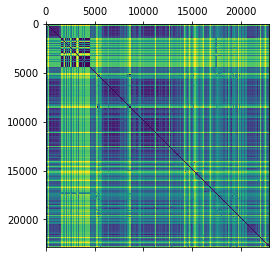

In [96]:
plt.matshow(prescriber_dist)

In [97]:
prescriber_specialty_generic_df.iloc[6072,0:4]

npi                           1093805012
specialty_description    Family Practice
total_claim_count                    679
drug_count                            29
Name: 6072, dtype: object

In [98]:
# The prescriber referenced at position 6072 is an Internal Medicine. 
# We can now calculate the prescribers most similar to this Internal Medicine.
prescriber_dist[6072,:]

array([0.3367873 , 0.48474951, 0.49227295, ..., 0.57261739, 0.50546332,
       0.47610183])

In [99]:
# plotting the distances we can see that prescribers most like are probably also Internal Medicine.
#plt.scatter(np.arange(prescriber_dist.shape[0]),prescriber_dist[6072,:])

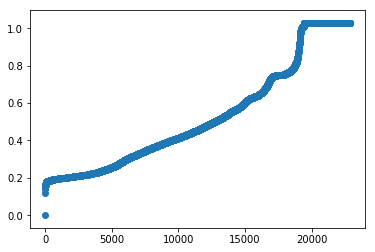

In [100]:
plt.scatter(np.arange(prescriber_dist.shape[0]),np.sort(prescriber_dist[6072,:]))

In [101]:
providers_sorted = np.lexsort((prescriber_dist[:,6072].tolist(),))

In [102]:
prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()[providers_sorted[0:40],:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1093805012, 'Family Practice'],
       [1790872638, 'Internal Medicine'],
       [1184607566, 'Internal Medicine'],
       [1083790729, 'Internal Medicine'],
       [1285670059, 'Internal Medicine'],
       [1831156819, 'Internal Medicine'],
       [1518037340, 'Internal Medicine'],
       [1689627267, 'Cardiac Surgery'],
       [1386605921, 'Internal Medicine'],
       [1902814478, 'Internal Medicine'],
       [1033166798, 'Family Practice'],
       [1679508048, 'Internal Medicine'],
       [1639148927, 'Internal Medicine'],
       [1922144401, 'Family Practice'],
       [1093802274, 'Family Practice'],
       [1033106117, 'Internal Medicine'],
       [1285790782, 'Internal Medicine'],
       [1447303417, 'Internal Medicine'],
       [1306867478, 'Internal Medicine'],
       [1093913444, 'Internal Medicine'],
       [1386688083, 'Internal Medicine'],
       [1235152554, 'Internal Medicine'],
       [1194760447, 'Internal Medicine'],
       [1932191665, 'Nephrology'],
       [1

In [103]:
np.lexsort(((-1 * pf_matrix[6072,:]).tolist(),))[0:17]

array([  54, 1141,   83, 1008,  677,  823,  497,  689,  637,  986,  817,
        662, 1166,  173,   42,  192,  842], dtype=int64)

In [104]:
generic_array[np.lexsort(((-1 * pf_matrix[6072,:]).tolist(),))][0:16]

Index(['AMLODIPINE BESYLATE', 'VALSARTAN/HYDROCHLOROTHIAZIDE',
       'ATORVASTATIN CALCIUM', 'SIMVASTATIN', 'MELOXICAM', 'OMEPRAZOLE',
       'GLIPIZIDE', 'METFORMIN HCL', 'LEVOTHYROXINE SODIUM',
       'ROSUVASTATIN CALCIUM', 'OLMESARTAN/HYDROCHLOROTHIAZIDE',
       'LOSARTAN/HYDROCHLOROTHIAZIDE', 'ZOLPIDEM TARTRATE', 'CARVEDILOL',
       'ALPRAZOLAM', 'CELECOXIB'],
      dtype='object')

In [105]:
part_d_df_small[part_d_df_small["npi"]==1093805012].sort_values("total_claim_count", ascending=False)

npi nppes_provider_city nppes_provider_state  \
2256040  1093805012         EAST ORANGE                   NJ   
2256041  1093805012         EAST ORANGE                   NJ   
2256066  1093805012         EAST ORANGE                   NJ   
2256063  1093805012         EAST ORANGE                   NJ   
2256056  1093805012         EAST ORANGE                   NJ   
2256059  1093805012         EAST ORANGE                   NJ   
2256057  1093805012         EAST ORANGE                   NJ   
2256048  1093805012         EAST ORANGE                   NJ   
2256054  1093805012         EAST ORANGE                   NJ   
2256046  1093805012         EAST ORANGE                   NJ   
2256043  1093805012         EAST ORANGE                   NJ   
2256067  1093805012         EAST ORANGE                   NJ   
2256055  1093805012         EAST ORANGE                   NJ   
2256044  1093805012         EAST ORANGE                   NJ   
2256051  1093805012         EAST ORANGE                   NJ   
2256039  1093805012         EAST ORANGE                   NJ   
2256045  1093805012         EAST ORANGE                   NJ   
2256047  1093805012         EAST ORANGE                   NJ   
2256061  1093805012         EAST ORANGE                   NJ   
2256064  1093805012         EAST ORANGE                   NJ   
2256052  1093805012         EAST ORANGE                   NJ   
2256058  1093805012         EAST ORANGE                   NJ   
2256060  1093805012         EAST ORANGE                   NJ   
2256065  1093805012         EAST ORANGE                   NJ   
2256053  1093805012         EAST ORANGE                   NJ   
2256050  1093805012         EAST ORANGE                   NJ   
2256049  1093805012         EAST ORANGE                   NJ   
2256062  1093805012         EAST ORANGE                   NJ   
2256042  1093805012         EAST ORANGE                   NJ   

        specialty_description description_flag                      drug_name  \
2256040       Family Practice                S            AMLODIPINE BESYLATE   
2256041       Family Practice                S           ATORVASTATIN CALCIUM   
2256066       Family Practice                S  VALSARTAN-HYDROCHLOROTHIAZIDE   
2256063       Family Practice                S                    SIMVASTATIN   
2256056       Family Practice                S                      MELOXICAM   
2256059       Family Practice                S                     OMEPRAZOLE   
2256057       Family Practice                S                  METFORMIN HCL   
2256048       Family Practice                S                     DIOVAN HCT   
2256054       Family Practice                S           LEVOTHYROXINE SODIUM   
2256046       Family Practice                S                        CRESTOR   
2256043       Family Practice                S                    BENICAR HCT   
2256067       Family Practice                S              ZOLPIDEM TARTRATE   
2256055       Family Practice                S   LOSARTAN-HYDROCHLOROTHIAZIDE   
2256044       Family Practice                S                     CARVEDILOL   
2256051       Family Practice                S                   GLIPIZIDE ER   
2256039       Family Practice                S                     ALPRAZOLAM   
2256045       Family Practice                S                       CELEBREX   
2256047       Family Practice                S                         DIOVAN   
2256061       Family Practice                S                  OXYCODONE HCL   
2256064       Family Practice                S                 TAMSULOSIN HCL   
2256052       Family Practice                S                   GLIPIZIDE XL   
2256058       Family Practice                S             MONTELUKAST SODIUM   
2256060       Family Practice                S                        ONGLYZA   
2256065       Family Practice                S     TRAMADOL HCL-ACETAMINOPHEN   
2256053       Family Practice                S                      IB